In [1]:
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog()

mask = halocat.halo_table['halo_upid']==-1
mask *= halocat.halo_table['halo_mvir'] >= 10**11
host_halos = halocat.halo_table[mask]

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from halotools.utils import sliding_conditional_percentile

x = host_halos['halo_mvir']
y = host_halos['halo_spin']
nwin = 51
host_halos['halo_spin_percentile'] = sliding_conditional_percentile(x, y, nwin)


dp = 1./float(nwin)
low = host_halos['halo_spin_percentile'] - dp
high = host_halos['halo_spin_percentile'] + dp
npts = len(host_halos)
uran = np.random.uniform(low, high, npts)

host_halos['halo_spin_percentile2'] = uran

# host_halos['halo_spin_percentile'].min(), host_halos['halo_spin_percentile'].max()

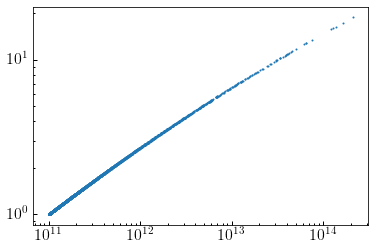

In [4]:
from halotools.empirical_models import polynomial_from_table

table_abscissa = [11, 13.5, 15]
table_ordinates = np.log10([1., 10., 30.])
input_abscissa = np.log10(x)
median_size = 10**polynomial_from_table(table_abscissa, table_ordinates, input_abscissa)

fig, ax = plt.subplots(1, 1)
__=ax.loglog()
nskip = 100
__=ax.scatter(x[::nskip], median_size[::nskip], s=1)



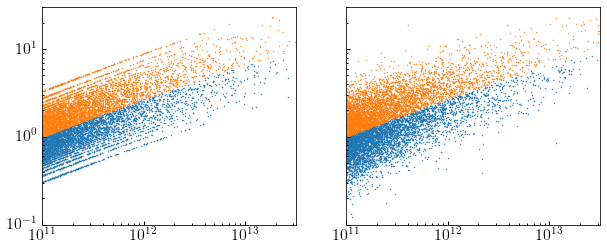

In [5]:

from halotools.empirical_models import polynomial_from_table
table_abscissa = [11, 13.5, 15]
table_ordinates = np.log10([1., 10., 30.])
input_abscissa = np.log10(x)
median_size = 10**polynomial_from_table(table_abscissa, table_ordinates, input_abscissa)

from scipy.stats import norm 

host_halos['disk_size'] = 10.**norm.isf(1. - host_halos['halo_spin_percentile'], 
                        loc=np.log10(median_size), scale=0.25)
host_halos['disk_size2'] = 10.**norm.isf(1. - host_halos['halo_spin_percentile2'], 
                        loc=np.log10(median_size), scale=0.25)

low_spin_mask = host_halos['halo_spin_percentile'] < 0.5
low_spin_mask2 = host_halos['halo_spin_percentile2'] < 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

__=ax1.loglog()
__=ax2.loglog()

nskip = 50
__=ax1.scatter(x[low_spin_mask][::nskip], 
              host_halos['disk_size'][low_spin_mask][::nskip], s=0.2)
__=ax1.scatter(x[~low_spin_mask][::nskip], 
              host_halos['disk_size'][~low_spin_mask][::nskip], s=0.2)

__=ax2.scatter(x[low_spin_mask2][::nskip], 
              host_halos['disk_size2'][low_spin_mask2][::nskip], s=0.2)
__=ax2.scatter(x[~low_spin_mask2][::nskip], 
              host_halos['disk_size2'][~low_spin_mask2][::nskip], s=0.2)

xlim1 = ax1.set_xlim(10**11, 10**13.5)
ylim1 = ax1.set_ylim(0.1, 30)
xlim2 = ax2.set_xlim(10**11, 10**13.5)
ylim2 = ax2.set_ylim(0.1, 30)